In [1]:
import tensorflow as tf 
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dir_path = os.path.abspath('')
dataset_folder = os.path.join(dir_path,'Dataset')
training_folder = os.path.join(dataset_folder,'training')
validation_folder = os.path.join(dataset_folder,'validation')

In [3]:
IMAGE_SIZE = [200,200]

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

batch_size = 128

train_generator = datagen.flow_from_directory(
    training_folder,
    shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = datagen.flow_from_directory(
    validation_folder,
    shuffle=False,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
ptm = VGG16(
    input_shape=IMAGE_SIZE+[3],
    weights='imagenet',
    include_top=False    
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
ptm.trainable=False

In [7]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model

x = Flatten()(ptm.output)
x = Dense(1, activation='sigmoid')(x)

In [8]:
model = Model(inputs=ptm.input,outputs=x)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [10]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
training_image_files = (len(os.listdir(training_folder+r'\Food'))+len(os.listdir(training_folder+r'\Not Food')))
validation_image_files = (len(os.listdir(validation_folder+r'\Food'))+len(os.listdir(validation_folder+r'\Not Food')))

In [12]:
import numpy as np
history = model.fit(
      train_generator,
      steps_per_epoch=int(np.ceil(training_image_files/batch_size)),  
      epochs=10,
      verbose=1,
      validation_data = valid_generator,   
      validation_steps=int(np.ceil(validation_image_files/batch_size)))

Epoch 1/10
24/24 [==============================] - 600s 25s/step - loss: 1.0863 - acc: 0.9133 - val_loss: 0.4353 - val_acc: 0.9658
Epoch 2/10
24/24 [==============================] - 568s 24s/step - loss: 0.2684 - acc: 0.9780 - val_loss: 0.3169 - val_acc: 0.9756
Epoch 3/10
24/24 [==============================] - 560s 23s/step - loss: 0.2417 - acc: 0.9797 - val_loss: 0.1987 - val_acc: 0.9844
Epoch 4/10
24/24 [==============================] - 625s 26s/step - loss: 0.1801 - acc: 0.9833 - val_loss: 0.0477 - val_acc: 0.9951
Epoch 5/10
24/24 [==============================] - 530s 22s/step - loss: 0.1444 - acc: 0.9870 - val_loss: 0.0944 - val_acc: 0.9902
Epoch 6/10
24/24 [==============================] - 369s 15s/step - loss: 0.0835 - acc: 0.9907 - val_loss: 0.0618 - val_acc: 0.9873
Epoch 7/10
24/24 [==============================] - 364s 15s/step - loss: 0.1012 - acc: 0.9890 - val_loss: 0.2158 - val_acc: 0.9844
Epoch 8/10
24/24 [==============================] - 367s 15s/step - loss: 0.

In [13]:
model.save('fnf.h5')

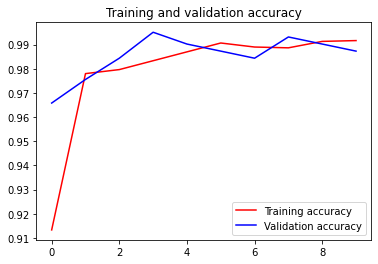

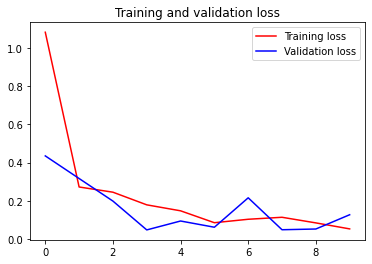

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()